In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip3 install pickle5
import pickle5 as pickle
with open('dataset_time.pkl', "rb") as fh:
  df = pickle.load(fh)

     |████████████████████████████████| 256 kB 5.2 MB/s 


In [ ]:
df.head()

,fire,veg,tair,tmax,prec,wind,year,month
0,0.0,0.519537,281.850800,287.042877,0.000000e+00,2.924010,2001,1
1,0.0,0.522642,282.009521,286.676941,1.428358e-07,2.436872,2001,1
2,0.0,0.525748,280.715393,283.814606,1.779684e-05,1.660926,2001,1
3,0.0,0.528854,281.651886,283.489288,9.013197e-05,2.029600,2001,1
4,0.0,0.531959,280.482574,283.335846,1.318250e-04,3.849517,2001,1


In [ ]:
df.shape

(4932, 8)

In [ ]:
df.isnull().any() 

fire     False
veg      False
tair     False
tmax     False
prec     False
wind     False
year     False
month    False
dtype: bool

In [ ]:
df.describe()

,fire,veg,tair,tmax,prec,wind,year,month
count,4.932000e+03,4932.000000,4932.000000,4932.000000,4.932000e+03,4932.000000,4932.000000,4932.000000
mean,4.851529e+05,0.615639,287.358276,291.962830,5.146567e-05,3.208490,2007.293390,6.427413
std,2.416577e+06,0.042578,4.900804,5.822189,1.056126e-04,1.365396,3.905507,3.436565
min,0.000000e+00,0.418210,274.894012,276.355804,0.000000e+00,0.936329,2001.000000,1.000000
25%,0.000000e+00,0.593076,283.549400,287.063660,0.000000e+00,2.125525,2004.000000,3.000000
50%,0.000000e+00,0.619659,287.057938,291.222031,8.237752e-07,2.891564,2007.000000,6.000000
75%,0.000000e+00,0.647683,291.347519,296.355911,5.169595e-05,3.996434,2011.000000,9.000000
max,3.500581e+07,0.688896,301.290588,310.879608,1.005264e-03,9.724447,2014.000000,12.000000


In [ ]:
df['fire'].value_counts()

0.000000         3855
241491.000000       3
7790.032227         3
23370.097656        3
38950.160156        3
                 ... 
96595.750000        1
67974.585938        1
52825.500000        1
51148.500000        1
48298.199219        1
Name: fire, Length: 941, dtype: int64

Text(0.5, 1.0, 'A plot of Fire against Years from 2001 to 2014')

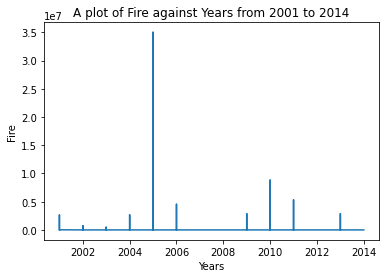

In [ ]:
import matplotlib.pyplot as plt
x = df['year']
y = df['fire']
plt.plot(x,y)
plt.xlabel('Years')
plt.ylabel('Fire')
plt.title('A plot of Fire against Years from 2001 to 2014')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4932 entries, 0 to 4931
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fire    4932 non-null   float32
 1   veg     4932 non-null   float32
 2   tair    4932 non-null   float32
 3   tmax    4932 non-null   float32
 4   prec    4932 non-null   float32
 5   wind    4932 non-null   float32
 6   year    4932 non-null   int64  
 7   month   4932 non-null   int64  
dtypes: float32(6), int64(2)
memory usage: 192.8 KB


- No missing values nor dummy variables, we can therefore go ahead and use the dataset

## Month when fire was maximum in all the years

In [ ]:
# Worst month in all the years
fire_df = df['fire']
max_index = fire_df.idxmax() # to get index of maximum value
df.loc[max_index]

fire     3.500581e+07
veg      6.467643e-01
tair     2.908929e+02
tmax     2.958454e+02
prec     0.000000e+00
wind     3.282810e+00
year     2.005000e+03
month    7.000000e+00
Name: 1659, dtype: float64

In [ ]:
print('Month {} of the year {} is when the maximum value of fire was recorded throughout the years'.format(int(df.loc[max_index].month), 
                                                                                          int(df.loc[max_index].year)))

Month 7 of the year 2005 is when the maximum value of fire was recorded throughout the years


In [ ]:
# Worst month in every year
years = range(2001, 2015)
for i in years:
    df_new = df[df['year'].isin([i])].copy() # We work with a copy to avoid tempering with the original df
    fire_df = df_new['fire']
    max_index = fire_df.idxmax() # to get index of maximum value
    print('The month {} of the year {} is when the maximum value of fire was recorded. The value was {}'.format(
        int(df_new.loc[max_index].month),
        int(df_new.loc[max_index].year),
        df_new.loc[max_index].fire))

The month 8 of the year 2001 is when the maximum value of fire was recorded. The value was 2639955.0
The month 7 of the year 2002 is when the maximum value of fire was recorded. The value was 746977.1875
The month 7 of the year 2003 is when the maximum value of fire was recorded. The value was 475191.96875
The month 6 of the year 2004 is when the maximum value of fire was recorded. The value was 2663325.25
The month 7 of the year 2005 is when the maximum value of fire was recorded. The value was 35005812.0
The month 7 of the year 2006 is when the maximum value of fire was recorded. The value was 4540723.0
The month 1 of the year 2007 is when the maximum value of fire was recorded. The value was 0.0
The month 1 of the year 2008 is when the maximum value of fire was recorded. The value was 0.0
The month 8 of the year 2009 is when the maximum value of fire was recorded. The value was 2865866.25
The month 7 of the year 2010 is when the maximum value of fire was recorded. The value was 8826

### Corresponding Features

In [ ]:
# Worst month in every year
max_fire_features = []
years = range(2001, 2015)
for i in years:
    df_new = df[df['year'].isin([i])].copy() # We work with a copy to avoid tempering with the original df
    fire_df = df_new['fire']
    max_index = fire_df.idxmax() # to get index of maximum value
    features = df_new.loc[max_index]
    max_fire_features.append(features)

In [ ]:
max_fire_features_df = pd.DataFrame(max_fire_features)
max_fire_features_df

,fire,veg,tair,tmax,prec,wind,year,month
229,2.639955e+06,0.645835,293.060852,297.353485,0.000000,2.638513,2001.0,8.0
564,7.469772e+05,0.661517,290.333038,295.824219,0.000000,5.610419,2002.0,7.0
928,4.751920e+05,0.658878,297.614136,305.025024,0.000000,3.495153,2003.0,7.0
1264,2.663325e+06,0.652399,293.548615,299.065948,0.000000,3.970703,2004.0,6.0
1659,3.500581e+07,0.646764,290.892914,295.845398,0.000000,3.282810,2005.0,7.0
2024,4.540723e+06,0.626935,294.144836,298.045319,0.000056,2.076092,2006.0,7.0
2179,0.000000e+00,0.587520,285.592468,287.404449,0.000189,3.142594,2007.0,1.0
2544,0.000000e+00,0.498767,280.897888,283.869812,0.000095,4.922199,2008.0,1.0
3151,2.865866e+06,0.660475,297.685028,305.441315,0.000000,2.071964,2009.0,8.0
3485,8.826106e+06,0.663072,296.892090,303.947662,0.000000,3.178471,2010.0,7.0


### Fire Threshold Values

In [ ]:
veg_mean = max_fire_features_df['veg'].mean()
tair_mean = max_fire_features_df['tair'].mean()
tmax_mean = max_fire_features_df['tmax'].mean()
prec_mean = max_fire_features_df['prec'].mean()
wind_mean = max_fire_features_df['wind'].mean()

In [ ]:
print('The threshold features that lead to fire are:\n veg: {}\n tair: {}\n tmax: {}\n prec: {}\n wind: {}'.format(
    veg_mean, tair_mean, tmax_mean,prec_mean,wind_mean))

The threshold features that lead to fire are:
 veg: 0.6175503347601209
 tair: 291.33580017089844
 tmax: 296.27457101004467
 prec: 6.69785282038252e-05
 wind: 3.758772645677839


## Year with worst fire from year 2001 -2014

In [ ]:
fires_dictionary = {}
for i in years:
    df_new = df[df['year'].isin([i])].copy() # We work with a copy to avoid tempering with the original df
    fire_df = df_new['fire']
    fire_sum = fire_df.sum() # to get value of total fires
    case = {i: fire_sum}
    fires_dictionary.update(case)

In [ ]:
fires_dictionary

{2001: 124394670.0,
 2002: 38021410.0,
 2003: 14972442.0,
 2004: 156244640.0,
 2005: 1102970000.0,
 2006: 143069980.0,
 2007: 0.0,
 2008: 0.0,
 2009: 128312190.0,
 2010: 294189660.0,
 2011: 191931650.0,
 2012: 0.0,
 2013: 198666600.0,
 2014: 0.0}

In [ ]:
max_year = max(fires_dictionary, key = fires_dictionary.get)
print('The year when maximum fire was experienced is {}'.format(max_year))

The year when maximum fire was experienced is 2005


# Modeling

### X-Y Split

In [ ]:
x = df.loc[:, df.columns != 'fire']
type(x)

pandas.core.frame.DataFrame

In [ ]:
print('Shape: ', x.shape)
x.head()

Shape:  (4932, 7)


,veg,tair,tmax,prec,wind,year,month
0,0.519537,281.850800,287.042877,0.000000e+00,2.924010,2001,1
1,0.522642,282.009521,286.676941,1.428358e-07,2.436872,2001,1
2,0.525748,280.715393,283.814606,1.779684e-05,1.660926,2001,1
3,0.528854,281.651886,283.489288,9.013197e-05,2.029600,2001,1
4,0.531959,280.482574,283.335846,1.318250e-04,3.849517,2001,1


In [ ]:
y = df["fire"]
type(y)

pandas.core.series.Series

In [ ]:
print('Shape: ', y.shape)
y.head()

Shape:  (4932,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fire, dtype: float32

### Train - Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train.head()

,veg,tair,tmax,prec,wind,year,month
1024,0.593894,286.449646,288.544800,0.000024,3.239456,2003,11
2572,0.523059,282.031647,288.318542,0.000000,1.282783,2008,1
324,0.633246,282.010437,285.350708,0.000000,1.698439,2001,12
1495,0.609453,279.666565,285.238007,0.000000,4.675715,2005,2
998,0.645931,290.318542,296.683136,0.000000,3.857375,2003,10


In [ ]:
x_train.shape

(3945, 7)

In [ ]:
x_test.shape

(987, 7)

### Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler().fit(x_train)

In [ ]:
x_train_std = sc.transform(x_train)

In [ ]:
x_test_std = sc.transform(x_test)

In [ ]:
x_test_std

array([[-0.28656076,  0.05102202, -0.25334862, ..., -0.1215275 ,
        -1.3449707 ,  1.35057887],
       [-0.36649918,  0.89094057,  0.83258676, ...,  0.72096061,
         0.69743296,  0.76472658],
       [ 1.12331738,  1.28791218,  1.56698082, ..., -0.86576922,
        -0.83436978,  0.76472658],
       ...,
       [-0.74298   , -1.20497696, -0.89995221, ..., -1.03884503,
        -0.06846841, -1.57868257],
       [ 0.85522398,  0.31826601,  0.11871873, ...,  0.30431683,
         0.69743296, -0.11405185],
       [ 0.22940335, -2.17726076, -2.01195964, ...,  1.40359994,
         0.69743296, -1.57868257]])

In [ ]:
x_test

,veg,tair,tmax,prec,wind,year,month
662,0.603843,287.699463,290.584686,0.000008,3.034380,2002,11
3534,0.600441,291.829590,296.960510,0.000005,4.182255,2010,9
1353,0.663849,293.781616,301.272339,0.000000,2.020365,2004,9
4722,0.528906,283.136505,287.665955,0.000301,5.236522,2013,12
3062,0.609876,292.690033,299.505585,0.000000,1.642647,2009,6
...,...,...,...,...,...,...,...
4827,0.600992,284.266479,288.622559,0.000048,4.050830,2014,4
3329,0.573021,284.198547,286.150635,0.000529,8.187447,2010,2
2180,0.584418,281.523346,286.788300,0.000000,1.784552,2007,1
3437,0.652438,289.013580,292.769196,0.000008,3.614586,2010,6


### Training Regression Tree

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_reg = RandomForestRegressor(n_estimators=1000, n_jobs = -1, random_state = 42)

In [ ]:
#Gridsearch
#from sklearn.model_selection import GridSearchCV
#params_grid = {"n_estimators" : [600,700,800,900,1000],
#              "max_depth" : [1,2,3,4,5],
#               "min_samples_split" : [2,3,4,5]
#              }

In [ ]:
#grid_search = GridSearchCV(rf_reg, params_grid, 
 #                         n_jobs = -1, cv = 5, scoring = 'r2')

In [ ]:
rf_reg.fit(x_train_std, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
#cvrf_reg = grid_search.best_estimator_

In [ ]:
#cvrf_reg.fit(x_train_std1, y_train)

### Predicting wih the trained model

In [ ]:
y_test_pred = rf_reg.predict(x_test_std)
y_train_pred = rf_reg.predict(x_train_std)

In [ ]:
y_test_pred

array([4.04544055e+04, 2.70831360e+05, 2.34183103e+05, 0.00000000e+00,
       4.23175481e+04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.16889144e+06, 0.00000000e+00, 1.23106570e+03, 4.13206925e+03,
       2.91740709e+05, 2.28639819e+04, 3.70621250e+02, 1.68390594e+06,
       2.43642382e+03, 0.00000000e+00, 2.19102563e+03, 1.09006250e+01,
       1.84396793e+06, 0.00000000e+00, 0.00000000e+00, 1.19070924e+04,
       1.21519531e+05, 0.00000000e+00, 0.00000000e+00, 3.41883233e+04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.88311422e+05,
       9.39120000e+01, 2.46397254e+04, 3.09256682e+05, 1.24099412e+03,
       0.00000000e+00, 6.85669933e+04, 2.59609129e+04, 0.00000000e+00,
       1.68555670e+06, 0.00000000e+00, 9.34938789e+02, 0.00000000e+00,
       0.00000000e+00, 4.77945000e+01, 0.00000000e+00, 9.65946214e+05,
       0.00000000e+00, 1.85204623e+04, 2.12420330e+05, 0.00000000e+00,
       2.76705000e+01, 2.73761427e+04, 0.00000000e+00, 8.95216360e+04,
      

### Model Perfomance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten,TimeDistributed
from sklearn.model_selection import train_test_split
from keras.layers.convolutional_recurrent import ConvLSTM2D

In [ ]:
xtrain_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) 

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(7, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-1), loss = 'mean_squared_error',metrics = 'mae')

In [ ]:
history = model.fit(xtrain_reshaped, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
278/278 [==============================] - 2s 5ms/step - loss: 5378367553536.0000 - mae: 654820.0625
Epoch 2/100
278/278 [==============================] - 1s 5ms/step - loss: 5223355514880.0000 - mae: 645133.8750
Epoch 3/100
278/278 [==============================] - 1s 4ms/step - loss: 5159621492736.0000 - mae: 646032.8125
Epoch 4/100
278/278 [==============================] - 1s 3ms/step - loss: 5122862088192.0000 - mae: 631839.3125
Epoch 5/100
278/278 [==============================] - 1s 3ms/step - loss: 5111053025280.0000 - mae: 626822.0625
Epoch 6/100
278/278 [==============================] - 1s 3ms/step - loss: 5062684311552.0000 - mae: 619981.4375
Epoch 7/100
278/278 [==============================] - 1s 3ms/step - loss: 5033137012736.0000 - mae: 612718.7500
Epoch 8/100
278/278 [==============================] - 1s 3ms/step - loss: 5002944315392.0000 - mae: 614817.2500
Epoch 9/100
278/278 [==============================] - 1s 4ms/step - loss: 4972347916288.0000 - 

In [ ]:
loss = pd.DataFrame(history.history)
loss

,loss,mae
0,5.378368e+12,654820.06250
1,5.223356e+12,645133.87500
2,5.159621e+12,646032.81250
3,5.122862e+12,631839.31250
4,5.111053e+12,626822.06250
...,...,...
95,1.413374e+12,341228.28125
96,1.390772e+12,358005.37500
97,1.427862e+12,345077.15625
98,1.652743e+12,357968.03125


In [ ]:
mean_squared_error(y_test, y_test_pred)

388893005573.8062

In [ ]:
r2_score(y_train, y_train_pred)

0.9728597258597328

In [ ]:
r2_score(y_test, y_test_pred)

0.9195080668587611

Feature Importance

Text(0.5, 0, 'score')

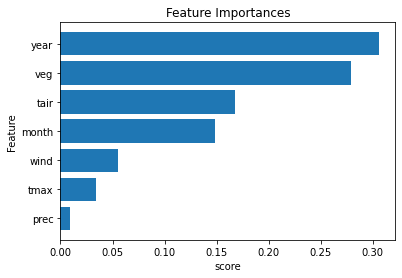

In [ ]:
sorted_idx = rf_reg.feature_importances_.argsort()
plt.barh(list(x.columns[sorted_idx]), rf_reg.feature_importances_[sorted_idx])
plt.title('Feature Importances')
plt.ylabel('Feature')
plt.xlabel('score')

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(n_jobs=-1)

In [ ]:
lr.fit(x_train_std, y_train)

LinearRegression(n_jobs=-1)

### Predicting with the Model

In [ ]:
y_test_pred = lr.predict(x_test_std)
y_train_pred = lr.predict(x_train_std)

In [ ]:
y_test_pred

array([ 6.94466985e+05,  1.09241839e+06,  1.32839974e+06, -3.98253534e+05,
        9.57983488e+05, -2.70091658e+05, -4.32713216e+05,  3.08042031e+05,
        1.00461655e+06,  2.28260585e+05,  5.62381221e+05,  3.28408152e+05,
        1.02864603e+06,  7.57160013e+05,  3.45233192e+04,  1.32304885e+06,
        6.80852867e+05, -2.43791601e+05,  3.50685843e+05,  4.54837090e+05,
        1.28239374e+06, -5.91549379e+04,  3.85509000e+04,  1.09870445e+06,
        6.51256955e+05, -6.89218622e+05, -1.91487349e+05,  1.16529792e+06,
       -5.45141651e+05,  2.96458601e+05, -2.49683150e+05,  3.72686717e+05,
       -7.41327960e+04,  1.07251985e+06,  7.73475416e+05,  6.39990494e+05,
        1.45758292e+05,  1.06818470e+06,  1.03074454e+06, -5.16629313e+05,
        1.12053040e+06,  1.52319964e+05,  6.63720091e+05, -6.12998409e+05,
        6.80257810e+05, -2.96461012e+05, -5.91837864e+04,  1.12122281e+06,
        2.82826440e+05,  1.17492913e+06,  1.42198228e+06,  4.26566752e+05,
        5.30433715e+05,  

### Model Perfomance

In [ ]:
mean_squared_error(y_test, y_test_pred)

4464218360113.907

In [ ]:
mean_squared_error(y_train, y_train_pred)

5705555244508.796

In [ ]:
r2_score(y_train, y_train_pred)

0.06293392417116306

In [ ]:
r2_score(y_test, y_test_pred)

0.07600918345140173

In [ ]:
# The linear regression model performs very poorly

## LSTM Model

In [ ]:
x_train_full, x_test, y_train_full, y_test = train_test_split(x, y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_full, y_train_full, random_state = 42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid = scaler.fit_transform(x_valid)
x_test = scaler.fit_transform(x_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
x_train.shape

(2774, 7)

In [ ]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.callbacks import EarlyStopping
from keras import Sequential

In [ ]:
model = Sequential()  
model.add(LSTM(1, batch_input_shape=(None, 7, 1), return_sequences=False))
model.add(Dense(100))
model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['mae'])

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=2,validation_data=(x_valid, y_valid))

Epoch 1/100
278/278 - 8s - loss: 482919.5000 - mae: 482919.5000 - val_loss: 375041.9688 - val_mae: 375041.9688 - 8s/epoch - 28ms/step
Epoch 2/100
278/278 - 2s - loss: 482919.4375 - mae: 482919.4375 - val_loss: 375041.9688 - val_mae: 375041.9688 - 2s/epoch - 6ms/step
Epoch 3/100
278/278 - 2s - loss: 482919.5000 - mae: 482919.5000 - val_loss: 375041.9688 - val_mae: 375041.9688 - 2s/epoch - 6ms/step
Epoch 4/100
278/278 - 2s - loss: 482919.4062 - mae: 482919.4062 - val_loss: 375041.9688 - val_mae: 375041.9688 - 2s/epoch - 6ms/step
Epoch 5/100
278/278 - 2s - loss: 482919.5312 - mae: 482919.5312 - val_loss: 375041.9688 - val_mae: 375041.9688 - 2s/epoch - 7ms/step
Epoch 6/100
278/278 - 2s - loss: 482919.4375 - mae: 482919.4375 - val_loss: 375041.9688 - val_mae: 375041.9688 - 2s/epoch - 7ms/step
Epoch 7/100
278/278 - 1s - loss: 482919.6250 - mae: 482919.6250 - val_loss: 375041.9688 - val_mae: 375041.9688 - 1s/epoch - 5ms/step
Epoch 8/100
278/278 - 1s - loss: 482919.4062 - mae: 482919.4062 - va

In [ ]:
loss = pd.DataFrame(history.history)
loss

,loss,mae,val_loss,val_mae
0,482919.50000,482919.50000,375041.96875,375041.96875
1,482919.43750,482919.43750,375041.96875,375041.96875
2,482919.50000,482919.50000,375041.96875,375041.96875
3,482919.40625,482919.40625,375041.96875,375041.96875
4,482919.53125,482919.53125,375041.96875,375041.96875
...,...,...,...,...
95,482919.62500,482919.62500,375041.96875,375041.96875
96,482919.43750,482919.43750,375041.96875,375041.96875
97,482919.68750,482919.68750,375041.96875,375041.96875
98,482919.40625,482919.40625,375041.96875,375041.96875


Text(0.5, 1.0, 'Loss vs Epochs')

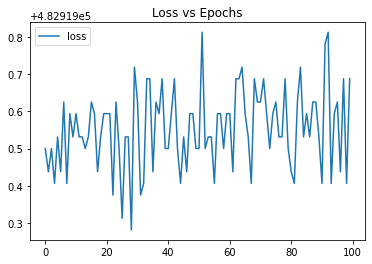

In [ ]:
plt.plot(loss['loss'],label = 'loss')
plt.legend()
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'mae vs epochs')

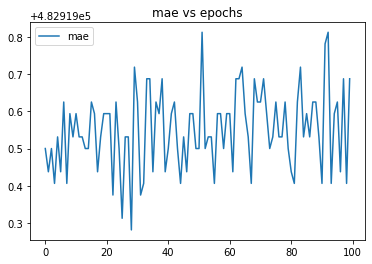

In [ ]:
plt.plot(loss['mae'],label = 'mae')
plt.legend()
plt.title('mae vs epochs')

# ANN

In [ ]:
# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 7))

# Adding the second hidden layer
model.add(Dense(units = 128, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 128, activation = 'relu'))

# Adding the output layer
model.add(Dense(units = 1))

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 1e-1),loss = 'mean_squared_error',metrics = 'mae')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                256       
                                                                 
 dense_2 (Dense)             (None, 128)               4224      
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 21,121
Trainable params: 21,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, batch_size = 10, epochs = 277)

Epoch 1/277
278/278 [==============================] - 1s 2ms/step - loss: 5357524484096.0000 - mae: 607552.6250
Epoch 2/277
278/278 [==============================] - 1s 2ms/step - loss: 5280453623808.0000 - mae: 590462.8750
Epoch 3/277
278/278 [==============================] - 1s 2ms/step - loss: 5308134981632.0000 - mae: 569305.9375
Epoch 4/277
278/278 [==============================] - 1s 2ms/step - loss: 5142682271744.0000 - mae: 582279.9375
Epoch 5/277
278/278 [==============================] - 1s 2ms/step - loss: 5113990086656.0000 - mae: 572383.1875
Epoch 6/277
278/278 [==============================] - 0s 2ms/step - loss: 5014073376768.0000 - mae: 579161.8750
Epoch 7/277
278/278 [==============================] - 1s 2ms/step - loss: 4885606039552.0000 - mae: 562783.1250
Epoch 8/277
278/278 [==============================] - 1s 2ms/step - loss: 4688203743232.0000 - mae: 547206.9375
Epoch 9/277
278/278 [==============================] - 1s 2ms/step - loss: 4364686065664.0000 - 

In [ ]:
loss = pd.DataFrame(history.history)

In [ ]:
loss

,loss,mae
0,5.357524e+12,607552.625000
1,5.280454e+12,590462.875000
2,5.308135e+12,569305.937500
3,5.142682e+12,582279.937500
4,5.113990e+12,572383.187500
...,...,...
272,1.776287e+11,134600.796875
273,2.391911e+11,135376.812500
274,3.727870e+11,152602.125000
275,2.489019e+11,141475.421875


Text(0.5, 1.0, 'Loss vs Epochs')

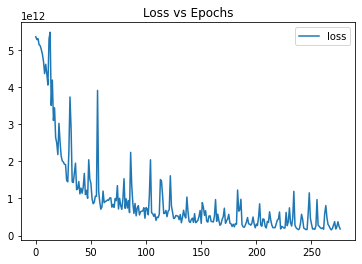

In [ ]:
plt.plot(loss['loss'],label = 'loss')
plt.legend()
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'mae vs epochs')

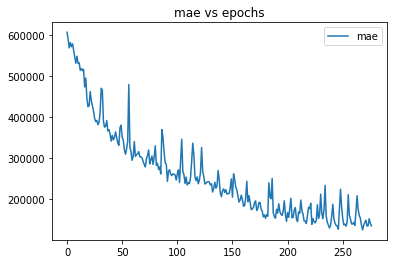

In [ ]:
plt.plot(loss['mae'],label = 'mae')
plt.legend()
plt.title('mae vs epochs')

Text(0.5, 1.0, 'Original Data vs Predicted data for ANN')

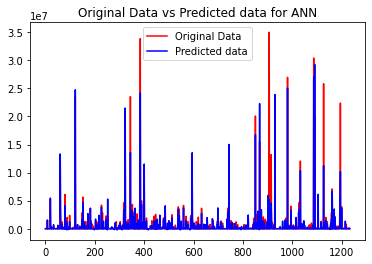

In [ ]:
y_pred = model.predict(x_test)
test = pd.DataFrame(y_test)
test.reset_index(drop=True, inplace=True)
plt.plot(test['fire'], c='r',label='Original Data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.legend()
plt.title('Original Data vs Predicted data for ANN')

In [ ]:
## R2 Score
r2_score(test['fire'].values, y_pred)

0.7984181517790703

# SARIMA MODEL

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from datetime import date, timedelta
dt = pd.date_range(start='1/1/2001', end='7/3/2014')

In [ ]:
df['my_date'] = dt
df.head()

,fire,veg,tair,tmax,prec,wind,year,month,my_date
0,0.0,0.519537,281.850800,287.042877,0.000000e+00,2.924010,2001,1,2001-01-01
1,0.0,0.522642,282.009521,286.676941,1.428358e-07,2.436872,2001,1,2001-01-02
2,0.0,0.525748,280.715393,283.814606,1.779684e-05,1.660926,2001,1,2001-01-03
3,0.0,0.528854,281.651886,283.489288,9.013197e-05,2.029600,2001,1,2001-01-04
4,0.0,0.531959,280.482574,283.335846,1.318250e-04,3.849517,2001,1,2001-01-05


In [ ]:
df.index = df['my_date']

In [ ]:
fr = []
for i in range(0,df.shape[0]):
    res = df['fire'][i]+1e-9
    fr.append(res)
df['fire_scaled'] = fr

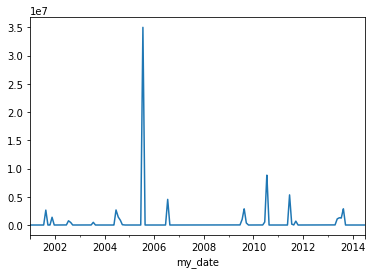

In [ ]:
df['fire_scaled'].plot()

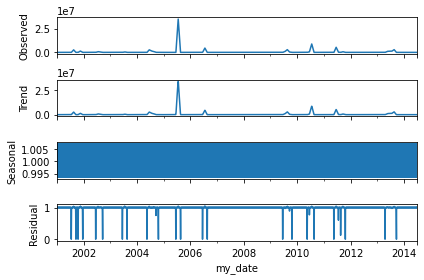

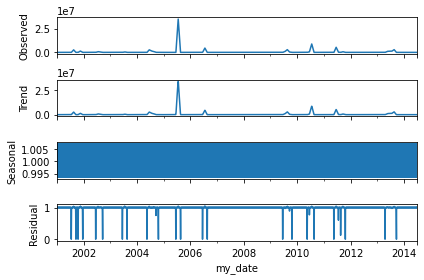

In [ ]:
result_a = seasonal_decompose(df['fire_scaled'], model = 'multiplicative')
result_a.plot()

In [ ]:
model = SARIMAX(df['fire_scaled'], order = (3,1,1), seasonal_order = (3,2,1,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [ ]:
model_fit = model.fit()

In [ ]:
residuals = model_fit.resid

In [ ]:
residuals

my_date
2001-01-01    1.000000e-09
2001-01-02   -9.330250e-10
2001-01-03    5.692836e-10
2001-01-04   -2.499541e-10
2001-01-05    3.239211e-10
                  ...     
2014-06-29    3.482950e+00
2014-06-30   -8.345323e+00
2014-07-01   -1.302949e+00
2014-07-02    1.930504e+01
2014-07-03    5.467132e+01
Length: 4932, dtype: float64

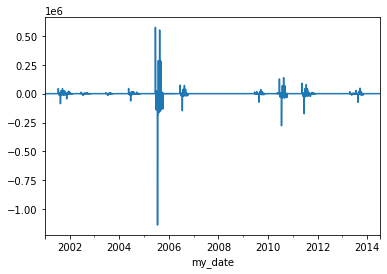

In [ ]:
residuals.plot()

In [ ]:
output = model_fit.forecast()

In [ ]:
output

2014-07-04    8.938392
Freq: D, dtype: float64

In [ ]:
yhat = model_fit.predict()

In [ ]:
yhat

2001-01-01    0.000000e+00
2001-01-02    1.933025e-09
2001-01-03    4.307164e-10
2001-01-04    1.249954e-09
2001-01-05    6.760789e-10
                  ...     
2014-06-29   -3.482950e+00
2014-06-30    8.345323e+00
2014-07-01    1.302949e+00
2014-07-02   -1.930504e+01
2014-07-03   -5.467132e+01
Freq: D, Length: 4932, dtype: float64

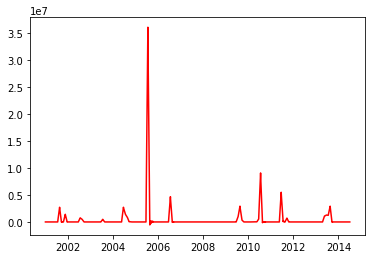

In [ ]:
plt.plot(yhat, color = 'red')

In [ ]:
## R2 Score
r2_score(df['fire_scaled'].values, yhat)

0.9999042977076221

In [ ]:
pred = pd.DataFrame(yhat)
pred = pred.rename(columns={0: 'predicted_mean'})


In [ ]:
pred

,predicted_mean
2001-01-01,0.000000e+00
2001-01-02,1.933025e-09
2001-01-03,4.307164e-10
2001-01-04,1.249954e-09
2001-01-05,6.760789e-10
...,...
2014-06-29,-3.482950e+00
2014-06-30,8.345323e+00
2014-07-01,1.302949e+00
2014-07-02,-1.930504e+01


In [ ]:
# Predicted Worst month in every year
years = range(2001, 2015)
print('As predicted by the model;')
for i in years:
    year_df = pred[pred.index.year.isin([i])].copy()
    max_value = year_df['predicted_mean'].max()
    worst_month = year_df['predicted_mean'].idxmax().month
    print('The month {} of the year {} is when the maximum value of fire was recorded. The value was {}'.format(
        worst_month,i,max_value))

As predicted by the model;
The month 8 of the year 2001 is when the maximum value of fire was recorded. The value was 2725627.9851791654
The month 7 of the year 2002 is when the maximum value of fire was recorded. The value was 763250.6163289691
The month 7 of the year 2003 is when the maximum value of fire was recorded. The value was 490579.6718378853
The month 6 of the year 2004 is when the maximum value of fire was recorded. The value was 2727171.3589626397
The month 7 of the year 2005 is when the maximum value of fire was recorded. The value was 36142574.413049966
The month 7 of the year 2006 is when the maximum value of fire was recorded. The value was 4687874.744677736
The month 1 of the year 2007 is when the maximum value of fire was recorded. The value was 394.29912842165896
The month 1 of the year 2008 is when the maximum value of fire was recorded. The value was 234.51239181772186
The month 8 of the year 2009 is when the maximum value of fire was recorded. The value was 29296

### Future Prediction

In [ ]:
def predict(days):#days-Number of days ahead that you want to be predicted
    result = model_fit.forecast(days)
    for i in range(0,days-1):
        if result[i]>0.00001:
            text = 'Possible Fire'
        else:
            text = 'No Possible Fire'
        date = result.index[i]
        print(date.strftime('%Y-%m-%d'),': {}'.format(text))

In [ ]:
future_pred = predict(10)

2014-07-04 : Possible Fire
2014-07-05 : Possible Fire
2014-07-06 : No Possible Fire
2014-07-07 : No Possible Fire
2014-07-08 : No Possible Fire
2014-07-09 : Possible Fire
2014-07-10 : Possible Fire
2014-07-11 : Possible Fire
2014-07-12 : Possible Fire


### Worst year and month by the model

In [ ]:
idx_max = np.argmax(yhat)
time = yhat.index[idx_max]
month = time.month
year = time.year

In [ ]:
print('Worst Year as per the model: {}'.format(year))
print('Worst Month as per the model: {}'.format(month))

Worst Year as per the model: 2005
Worst Month as per the model: 7


## ConvLSTM Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from keras.layers.convolutional_recurrent import ConvLSTM2D

In [ ]:
xtrain_reshaped = x_train.reshape(x_train.shape[0], x_train.shape[1], 1) 

In [ ]:
from keras.layers import Input, Dense, LSTM, MaxPooling1D, Conv1D
from keras.models import Model
from tensorflow.keras import layers
from keras.layers import InputLayer, ConvLSTM1D
from keras import layers
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers import Conv2DTranspose, ConvLSTM2D, BatchNormalization, TimeDistributed, Conv2D, Dense, Activation, LSTM
import tensorflow as tf
from tensorflow.keras import activations
from tensorflow.keras.optimizers import SGD, Adam


In [ ]:
model = Sequential()

# Input shape: (samples, time, channels, rows, cols) see: https://keras.io/layers/recurrent/#convlstm2d
model.add(ConvLSTM1D(
        filters=32,
        kernel_size=2 ,
        input_shape=(None, 7,1),
        padding='same',
        return_sequences=True))
model.add(layers.Activation(activations.relu))
model.add(BatchNormalization())
model.add(Flatten())

model.add(Dense(64, kernel_initializer='TruncatedNormal'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

model.add(Dense(32, kernel_initializer='TruncatedNormal'))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.2))

model.add(Dense(1))


ValueError: ignored

In [ ]:
lr= 1e-1
epochs = 50 #135
bs = 2**8

# compile & fit
model.compile(optimizer=adam, loss = ['mse'], metrics=['mse'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm1d_2 (ConvLSTM1D)  (None, None, 7, 32)       8576      
                                                                 
 activation_4 (Activation)   (None, None, 7, 32)       0         
                                                                 
 batch_normalization_2 (Batc  (None, None, 7, 32)      128       
 hNormalization)                                                 
                                                                 
 conv_lstm1d_3 (ConvLSTM1D)  (None, 7, 32)             16512     
                                                                 
 activation_5 (Activation)   (None, 7, 32)             0         
                                                                 
 batch_normalization_3 (Batc  (None, 7, 32)            128       
 hNormalization)                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
input_layer = Input(shape=( 7, 1))
conv1 = Conv1D(filters=32,
kernel_size=2,
strides=1,
padding='same', 
activation='relu')(input_layer)
pool1 = MaxPooling1D(pool_size=4)(conv1)
lstm1 = LSTM(32)(pool1)
output_layer = Dense(64, activation='relu')(lstm1)
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 7, 32)             96        
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 lstm_4 (LSTM)               (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
Total params: 10,528
Trainable params: 10,528
Non-trainable params: 0
_______________________________________________________

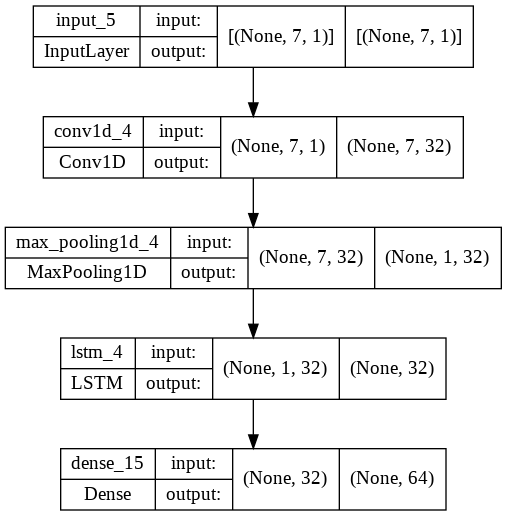

In [ ]:
keras.utils.plot_model(model , to_file='model.png' , show_shapes = True)

In [ ]:
early_stopping_monitor = EarlyStopping(patience=5000)



history = model.fit(xtrain_reshaped, y_train, epochs=epochs, batch_size=bs, verbose=1, callbacks=[early_stopping_monitor])

print(model.summary())

RuntimeError: ignored

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = 'mae')

In [ ]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(7, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(1))
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-1), loss = 'mean_squared_error',metrics = 'mae')

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model , to_file='model.png' , show_shapes = True)

In [ ]:
history = model.fit(xtrain_reshaped, y_train, batch_size = 10, epochs = 277)

Epoch 1/277


ValueError: ignored

In [ ]:
history = model.fit((xtrain_reshaped, y_train, batch_size = bs, epochs = 50)

SyntaxError: ignored

In [ ]:
loss = pd.DataFrame(history.history)
loss

,loss,mae
0,5.897180e+12,482920.06250
1,5.897179e+12,482920.09375
2,5.897179e+12,482920.15625
3,5.897180e+12,482920.15625
4,5.897179e+12,482920.09375
5,5.897179e+12,482920.09375
6,5.897179e+12,482920.18750
7,5.897179e+12,482920.09375
8,5.897179e+12,482920.09375
9,5.897179e+12,482920.09375


Text(0.5, 1.0, 'Loss vs Epochs')

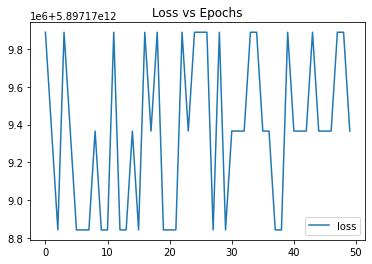

In [ ]:
plt.plot(loss['loss'],label = 'loss')
plt.legend()
plt.title('Loss vs Epochs')

Text(0.5, 1.0, 'mae vs epochs')

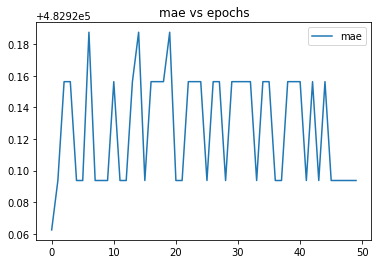

In [ ]:
plt.plot(loss['mae'],label = 'mae')
plt.legend()
plt.title('mae vs epochs')

In [ ]:
## R2 score

r2_score(y_test, model.predict(x_test))

ValueError: ignored

In [ ]:
r2_score(y_train, y_train_pred)

ValueError: ignored